In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import os

import msg_passing
import utils
import run
import display
import parse_data

In [61]:
test_g = nx.MultiGraph()
test_g.add_edge("a", "b", weight=1.0)
test_g.add_edge("a", "c", weight=-1.0)
#test_g.add_edge("b", "c", weight=1.0)
test_g.add_edge("a", "d", weight=-1.0)
test_g.add_edge("d", "c", weight=-1.0)
test_g.add_edge("c", "b", weight=0.1)
test_g.add_edge("b", "e", weight=1.0)
test_g.add_edge("c", "e", weight=0.1)
test_g.add_edge("d", "f", weight=1.0)
test_g.add_edge("c", "f", weight=0.1)
test_g.add_edge("c", "f", weight=0.3)
test_g.add_edge("f", "h", weight=-1.0)


msg_passing.initialize_node_values(test_g, size=3)
nodes = ["a", "b", "c", "d", "e", "f", "h"]
hist = {"a": [], "b": [], "c": [], "d": [], "e":[], "f":[]}

iters = 100000
per = iters // 1000
pper = iters // 10
hist, diagnostic_hist = msg_passing.pass_messages(test_g, 10**-3, 10**-3, iters, True, pruning=False, print_period=pper, save_period=per, history=hist)
#hist, diagnostic_hist = msg_passing.train_issue_vec_batch(test_g, iters, 10**-2, 10**-2, discount=0.95, batch_size=10, use_heat=True, print_period=pper, save_period=per, hist=hist)
#hist, diagnostic_hist = msg_passing.train_issue_vec(test_g, iters, 10**-3, discount=0.95, use_heat=True, print_period=pper, save_period=per, hist=hist)
#hist, diagnostic_hist = msg_passing.pass_messages_with_random_walks(test_g, 10**-3, 10**-3, iters, True, pruning=False, print_period=pper, save_period=per, history=hist, discount=0.95, path_length=10, batch_size=10)

iteration 0: update mag: 0.005936843764325457 loss: -1.0347174066937752
iteration 10000: update mag: 0.005736921445736395 loss: -4.035254619539733
iteration 20000: update mag: 0.004810603254941608 loss: -5.380340596153468
iteration 30000: update mag: 0.003058896036934485 loss: -5.618883349194595
iteration 40000: update mag: 0.004475116248652608 loss: -5.7319087625257605
iteration 50000: update mag: 0.005004146653626231 loss: -5.708729844686216
iteration 60000: update mag: 0.002200936553993212 loss: -5.629143551541909
iteration 70000: update mag: 0.0017073084148644133 loss: -5.60909535101921
iteration 80000: update mag: 0.0015619750428593785 loss: -5.694139395728817
iteration 90000: update mag: 0.000693027935282409 loss: -5.651811358676679
iteration 99999: update mag: 0.0006573750427436244 loss: -5.676507305190979


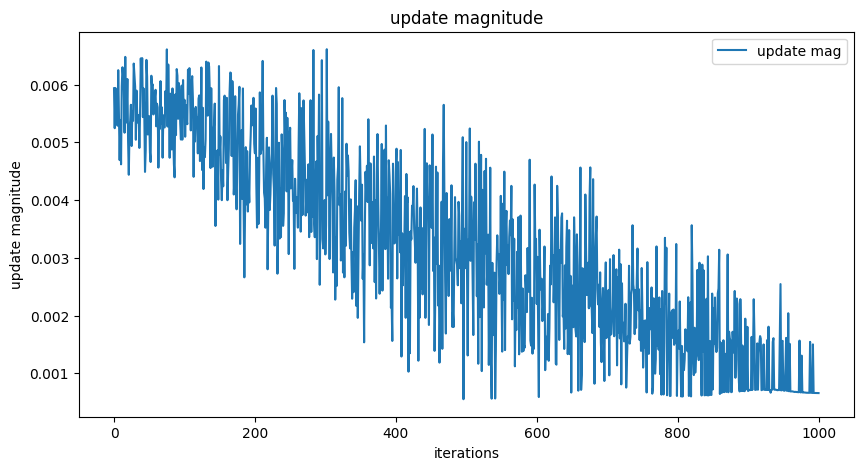

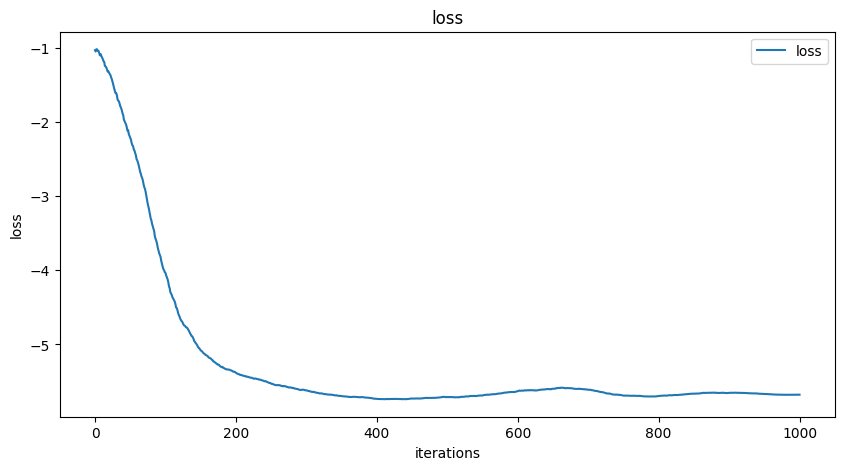

In [62]:
display.plot_diagnostic(diagnostic_hist)

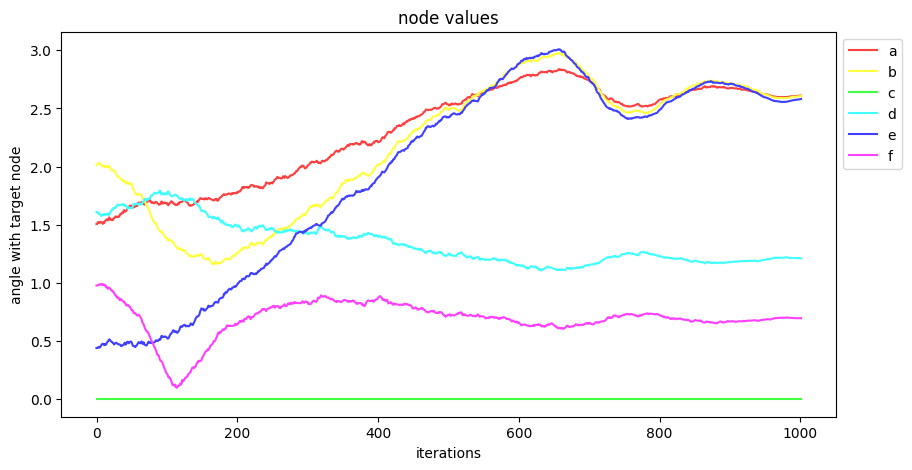

In [63]:

display.plot_history(hist, target="c")